# Unsupervised and supervised learning techniques on 100 stocks and related tweets

## Part 1: KDD Analysis

The goal of this analysis is to evaluate the riskness of the stocks using daily Open/High/Low/Close data combined with various indicators such as P/E, debt, ..., using clustering algorithms to identify stocks with similar levels of risk.

### Initial Exploratory Analysis

We firstly need to import the libraries and modules that we will use during our analysis.

In [1]:
# !pip install nltk
# !pip install textblob

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import pickle
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Let's start importing the datasets and visualizing their structure

In [3]:
df_top100info = pd.read_csv("./datasets/top100info.csv")
df_top100info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Columns: 101 entries, 0 to VYM
dtypes: float64(11), object(90)
memory usage: 47.5+ KB


In [4]:
df_top100info

,0,AAPL,AMZN,MSFT,SNAP,HOOD,WMT,GOOG,PTON,CPRX,...,ZM,CRM,FUBO,BND,RITM,SPHD,QS,VEA,IVR,VYM
0,Market Cap (intraday),2.61T,1.05T,2.17T,16.70B,8.97B,406.50B,1.37T,3.95B,1.84B,...,21.11B,192.55B,230.66M,NaN,3.70B,NaN,3.21B,NaN,446.26M,NaN
1,Enterprise Value,2.66T,1.12T,2.13T,16.94B,-4.48B,456.80B,1.28T,5.49B,1.54B,...,15.80B,194.13B,336.37M,NaN,NaN,NaN,2.25B,NaN,NaN,NaN
2,Trailing P/E,27.96,NaN,32.40,NaN,NaN,35.32,23.45,NaN,23.17,...,211.32,916.90,NaN,NaN,4.33,NaN,NaN,NaN,1.10,NaN
3,Forward P/E,27.86,63.69,26.95,NaN,NaN,24.75,19.80,NaN,11.59,...,17.33,27.03,NaN,NaN,5.61,NaN,NaN,NaN,1.99,NaN
4,PEG Ratio (5 yr expected),2.78,2.30,2.19,NaN,NaN,4.21,1.17,NaN,NaN,...,2.69,1.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Price/Sales (ttm),6.88,2.02,10.71,3.69,6.48,0.67,4.98,1.26,9.04,...,4.98,6.12,0.20,NaN,1.06,NaN,NaN,NaN,0.87,NaN
6,Price/Book (mrq),45.93,7.16,11.85,6.47,1.29,5.30,5.35,129.45,6.11,...,3.40,3.30,0.56,NaN,0.65,NaN,2.43,NaN,0.88,NaN
7,Enterprise Value/Revenue,6.88,2.17,10.44,3.68,-3.30,0.75,4.53,1.80,7.20,...,3.60,6.19,0.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Enterprise Value/EBITDA,20.81,29.10,21.58,-14.39,5.09,15.18,14.63,-2.17,14.96,...,48.20,34.40,-0.90,NaN,NaN,NaN,-6.03,NaN,NaN,NaN
9,Beta (5Y Monthly),1.30,1.25,0.92,1.20,NaN,0.49,1.09,1.95,1.16,...,-0.22,1.21,2.45,1.0,1.78,0.74,5.27,1.09,1.55,0.77


As we can see, this dataset contains information on 60 financial indicators from 100 companies. The dataset looks well structured and doesn't seem to need cleaning.

Let's check the number of null values.

In [5]:
df_top100info.isnull().sum()

0        0
AAPL     1
AMZN     7
MSFT     1
SNAP    12
        ..
SPHD    59
QS      18
VEA     59
IVR     10
VYM     59
Length: 101, dtype: int64

Small-cap companies seem to have an higher number of missing indicators.

Let's now analyse the other dataset.

In [6]:
df_top100 = pd.read_csv("./datasets/top100.csv")
df_top100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24849 entries, 0 to 24848
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      24849 non-null  int64  
 1   Unnamed: 0.6    12460 non-null  float64
 2   Unnamed: 0.5    7942 non-null   float64
 3   Unnamed: 0.4    4428 non-null   float64
 4   Unnamed: 0.3    1004 non-null   float64
 5   Unnamed: 0.2    753 non-null    float64
 6   Unnamed: 0.1    502 non-null    float64
 7   Unnamed: 0.1.1  251 non-null    float64
 8   Stock Name      24849 non-null  object 
 9   Date            24849 non-null  object 
 10  Open            24849 non-null  float64
 11  Close           24849 non-null  float64
 12  High            24849 non-null  float64
 13  Low             24849 non-null  float64
 14  Volume          24849 non-null  float64
dtypes: float64(12), int64(1), object(2)
memory usage: 2.8+ MB


In [7]:
df_top100

,Unnamed: 0,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0.1.1,Stock Name,Date,Open,Close,High,Low,Volume
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAPL,2022-01-10 05:00:00,169.0800,172.19,172.5000,168.1700,106754551.0
1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,AAPL,2022-01-11 05:00:00,172.3200,175.08,175.1800,170.8200,76138312.0
2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,AAPL,2022-01-12 05:00:00,176.1200,175.53,177.1800,174.8200,74805173.0
3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,AAPL,2022-01-13 05:00:00,175.7800,172.19,176.6200,171.7900,84405760.0
4,4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,AAPL,2022-01-14 05:00:00,171.3400,173.07,173.7800,171.0900,80440778.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24844,246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VYM,2023-01-03 05:00:00,108.5200,108.02,108.8000,107.2000,2377721.0
24845,247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VYM,2023-01-04 05:00:00,108.3200,108.94,109.5000,108.0300,7427816.0
24846,248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VYM,2023-01-05 05:00:00,108.4881,108.39,108.7500,107.8209,1829917.0
24847,249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VYM,2023-01-06 05:00:00,109.2900,110.77,111.0500,109.0900,1624080.0


The first 8 columns of the dataset seem to contain unspecified and mostly null data, let's discard them.

In [8]:
features = df_top100.columns[8:]
df_top100_cleaned = df_top100[features]
df_top100_cleaned

,Stock Name,Date,Open,Close,High,Low,Volume
0,AAPL,2022-01-10 05:00:00,169.0800,172.19,172.5000,168.1700,106754551.0
1,AAPL,2022-01-11 05:00:00,172.3200,175.08,175.1800,170.8200,76138312.0
2,AAPL,2022-01-12 05:00:00,176.1200,175.53,177.1800,174.8200,74805173.0
3,AAPL,2022-01-13 05:00:00,175.7800,172.19,176.6200,171.7900,84405760.0
4,AAPL,2022-01-14 05:00:00,171.3400,173.07,173.7800,171.0900,80440778.0
...,...,...,...,...,...,...,...
24844,VYM,2023-01-03 05:00:00,108.5200,108.02,108.8000,107.2000,2377721.0
24845,VYM,2023-01-04 05:00:00,108.3200,108.94,109.5000,108.0300,7427816.0
24846,VYM,2023-01-05 05:00:00,108.4881,108.39,108.7500,107.8209,1829917.0
24847,VYM,2023-01-06 05:00:00,109.2900,110.77,111.0500,109.0900,1624080.0


This dataset contains daily open, close, high, low and volume values ​​for the 100 stocks from the previous dataset.

Let's try to visualize the trend of the first 10 stocks of the dataset.

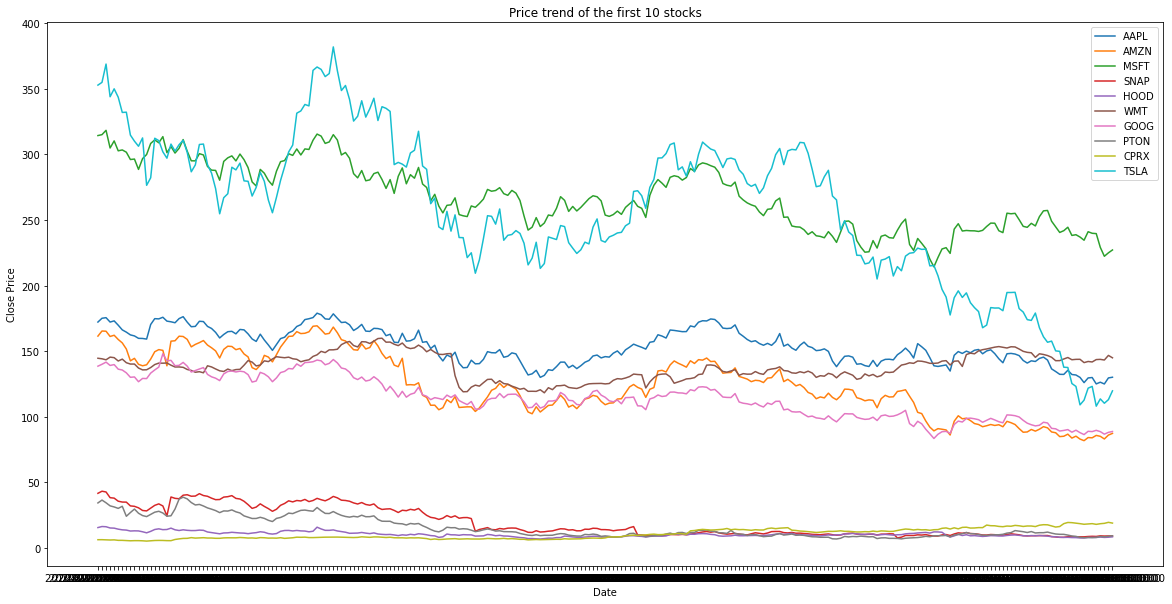

In [9]:
# select the first 10 stocks
stocks = df_top100_cleaned['Stock Name'].unique()[:10]

# create a lineplot for every stock selected
plt.figure(figsize=(20, 10))
for stock in stocks:
    data = df_top100_cleaned[df_top100_cleaned['Stock Name'] == stock]
    plt.plot(data["Date"], data['Close'], label=stock)

# add the legend to the plot
plt.legend()

# add labels and title
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Price trend of the first 10 stocks')

# show the plot
plt.show()

### Data Manipulation
An information that could be interesting for our analysis of the riskiness of stocks is the volatility, i.e. how much the price of a stock has changed in a given time interval, in our case daily.

Let's create a new column "volatility" in the OHLC dataset.

In [10]:
df_top100_cleaned["Volatility"] = (df_top100_cleaned["High"] - df_top100_cleaned["Low"]) / df_top100_cleaned["Open"]
df_top100_cleaned

,Stock Name,Date,Open,Close,High,Low,Volume,Volatility
0,AAPL,2022-01-10 05:00:00,169.0800,172.19,172.5000,168.1700,106754551.0,0.025609
1,AAPL,2022-01-11 05:00:00,172.3200,175.08,175.1800,170.8200,76138312.0,0.025302
2,AAPL,2022-01-12 05:00:00,176.1200,175.53,177.1800,174.8200,74805173.0,0.013400
3,AAPL,2022-01-13 05:00:00,175.7800,172.19,176.6200,171.7900,84405760.0,0.027478
4,AAPL,2022-01-14 05:00:00,171.3400,173.07,173.7800,171.0900,80440778.0,0.015700
...,...,...,...,...,...,...,...,...
24844,VYM,2023-01-03 05:00:00,108.5200,108.02,108.8000,107.2000,2377721.0,0.014744
24845,VYM,2023-01-04 05:00:00,108.3200,108.94,109.5000,108.0300,7427816.0,0.013571
24846,VYM,2023-01-05 05:00:00,108.4881,108.39,108.7500,107.8209,1829917.0,0.008564
24847,VYM,2023-01-06 05:00:00,109.2900,110.77,111.0500,109.0900,1624080.0,0.017934


Now we can group the various stocks and compute the mean of the values, in order to use the average volatility as part of the parameters to determine the riskness of the stocks.

In [11]:
df_top100_grouped = df_top100_cleaned.copy().groupby(["Stock Name"]).mean()
df_top100_grouped = df_top100_grouped[["Volatility"]]
df_top100_grouped

,Volatility
Stock Name,
AAL,0.045506
AAPL,0.027721
ABNB,0.048793
AMC,0.097717
AMD,0.048830
...,...
VYM,0.014782
WISH,0.087192
WMT,0.019650


Another interesting information could be the standard deviation of the closing prices and of the volumes of a stock.

In [12]:
df_std = df_top100_cleaned.copy().groupby(["Stock Name"]).std()
df_top100_grouped["Volume Standard Deviation"] = df_std[["Volume"]]
df_top100_grouped["Price Standard Deviation"] = df_std[["Close"]]
df_top100_grouped

,Volatility,Volume Standard Deviation,Price Standard Deviation
Stock Name,,,
AAL,0.045506,1.345385e+07,2.064661
AAPL,0.027721,2.364205e+07,13.244256
ABNB,0.048793,3.668290e+06,27.262229
AMC,0.097717,2.851603e+07,5.650513
AMD,0.048830,2.820410e+07,20.360618
...,...,...,...
VYM,0.014782,1.171254e+06,4.638676
WISH,0.087192,2.848659e+05,19.275580
WMT,0.019650,4.601939e+06,9.976401


Let's visualize this data with some charts.

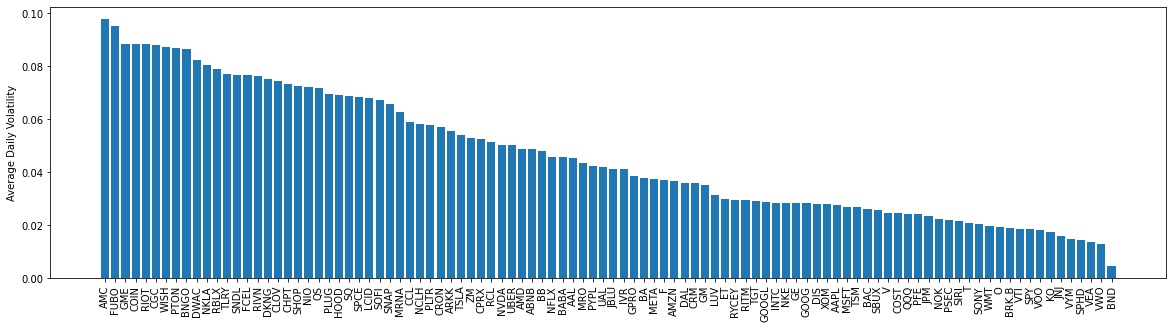

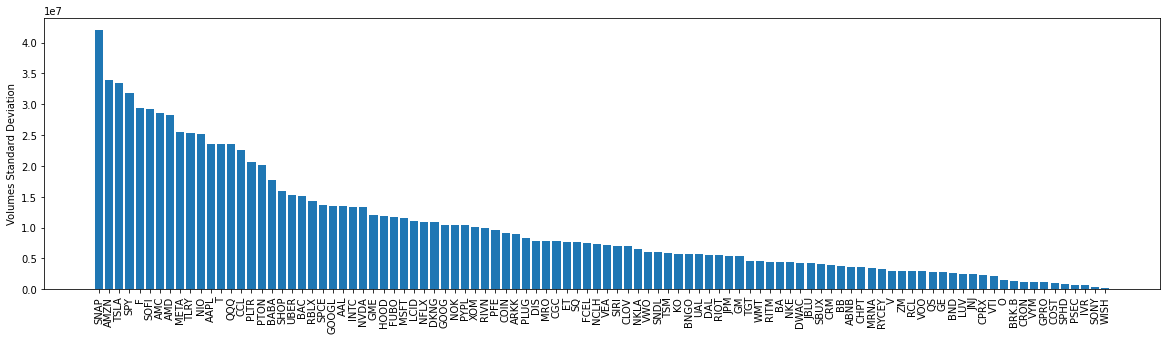

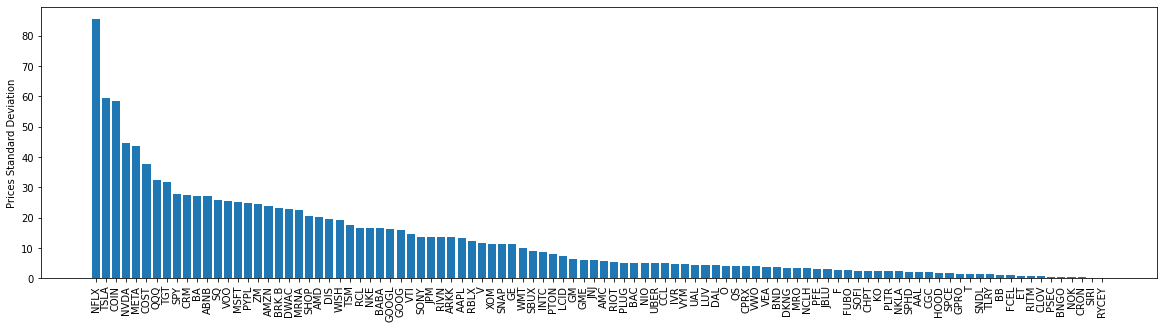

In [13]:
df_top100_grouped = df_top100_grouped.sort_values("Volatility", ascending=False)
plt.figure(figsize = (20, 5))
plt.bar(df_top100_grouped.index, df_top100_grouped["Volatility"])
plt.xticks(rotation=90)
plt.ylabel("Average Daily Volatility")
plt.show()

df_top100_grouped = df_top100_grouped.sort_values("Volume Standard Deviation", ascending=False)
plt.figure(figsize = (20, 5))
plt.bar(df_top100_grouped.index, df_top100_grouped["Volume Standard Deviation"])
plt.xticks(rotation=90)
plt.ylabel("Volumes Standard Deviation")
plt.show()

df_top100_grouped = df_top100_grouped.sort_values("Price Standard Deviation", ascending=False)
plt.figure(figsize = (20, 5))
plt.bar(df_top100_grouped.index, df_top100_grouped["Price Standard Deviation"])
plt.xticks(rotation=90)
plt.ylabel("Prices Standard Deviation")
plt.show()

Now we can combine this dataset with the other dataset. The information we are going to use as indicators of the riskness of a stock are:

- **Trailing P/E**: high values (> 13-15) could mean that the company is overrated and it could have big price swings
- **Total Debt/Equity (mrq)**: high debt ratio could mean that the company is investing a lot or has a lot of expenses, so could be more impredictible in the future
- **Beta (5Y Monthly)**: measure of the systematic risk of a stock compared to the market as a whole (usually SP500). Values < 1.0 means that the stock is less volatile than the market, and vice versa.
- **52-Week Change 3**: range designated by the highest and lowest price of a stock over the previous year.

Let's pick those information and join them with our dataframe.

Firstly, we need to transpose the dataframe to match the structure of the other we used.

In [14]:
#transpose the dataset, flipping the rows and columns
df_top100info_t = df_top100info.T.copy()

#select the first row of the transposed dataset, which contains the original column names
#this row is assigned to a new variable
new_header = df_top100info_t.iloc[0]

# remove the first row of the transposed data, which contains the original column names
df_top100info_t = df_top100info_t[1:]

#the columns attribute of the data is assigned the new_header variable, which contains the renamed column names.
df_top100info_t.columns = new_header
df_top100info_t

0,Market Cap (intraday),Enterprise Value,Trailing P/E,Forward P/E,PEG Ratio (5 yr expected),Price/Sales (ttm),Price/Book (mrq),Enterprise Value/Revenue,Enterprise Value/EBITDA,Beta (5Y Monthly),...,Diluted EPS (ttm),Quarterly Earnings Growth (yoy),Total Cash (mrq),Total Cash Per Share (mrq),Total Debt (mrq),Total Debt/Equity (mrq),Current Ratio (mrq),Book Value Per Share (mrq),Operating Cash Flow (ttm),Levered Free Cash Flow (ttm)
AAPL,2.61T,2.66T,27.96,27.86,2.78,6.88,45.93,6.88,20.81,1.30,...,5.90,-13.40%,51.36B,3.25,111.11B,195.87,0.94,3.58,109.19B,84.73B
AMZN,1.05T,1.12T,NaN,63.69,2.30,2.02,7.16,2.17,29.10,1.25,...,-0.28,-98.10%,70.03B,6.83,169.94B,116.36,0.94,14.26,46.75B,7.62M
MSFT,2.17T,2.13T,32.40,26.95,2.19,10.71,11.85,10.44,21.58,0.92,...,9.00,-12.50%,99.5B,13.37,77.98B,42.58,1.93,24.59,84.39B,44.61B
SNAP,16.70B,16.94B,NaN,NaN,NaN,3.69,6.47,3.68,-14.39,1.20,...,-0.84,NaN,3.94B,2.49,4.18B,161.79,4.32,1.64,184.61M,913.45M
HOOD,8.97B,-4.48B,NaN,NaN,NaN,6.48,1.29,-3.30,5.09,NaN,...,-1.20,NaN,9.86B,11,1.98B,28.49,1.35,7.79,-852M,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SPHD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QS,3.21B,2.25B,NaN,NaN,NaN,NaN,2.43,NaN,-6.03,5.27,...,-0.86,NaN,1.06B,2.41,105.42M,7.99,22.91,3.01,-218.02M,-242.25M
VEA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IVR,446.26M,NaN,1.10,1.99,NaN,0.87,0.88,NaN,NaN,1.55,...,-12.21,NaN,176.2M,4.55,4.24B,526.93,0.07,13.06,196.08M,NaN


Now we can select the columns we need.

In [15]:
df_top100info_reduced = df_top100info_t.copy()[["Trailing P/E", "Total Debt/Equity (mrq)", "Beta (5Y Monthly)", "52-Week Change 3"]]
df_top100info_reduced

0,Trailing P/E,Total Debt/Equity (mrq),Beta (5Y Monthly),52-Week Change 3
AAPL,27.96,195.87,1.30,-5.63%
AMZN,NaN,116.36,1.25,-35.76%
MSFT,32.40,42.58,0.92,-1.67%
SNAP,NaN,161.79,1.20,-69.55%
HOOD,NaN,28.49,NaN,-16.23%
...,...,...,...,...
SPHD,NaN,NaN,0.74,NaN
QS,NaN,7.99,5.27,-58.17%
VEA,NaN,NaN,1.09,NaN
IVR,1.10,526.93,1.55,-47.61%


And we can join the two dataframes.

In [16]:
df_joined = df_top100_grouped.join(df_top100info_reduced)
df_joined

,Volatility,Volume Standard Deviation,Price Standard Deviation,Trailing P/E,Total Debt/Equity (mrq),Beta (5Y Monthly),52-Week Change 3
Stock Name,,,,,,,
NFLX,0.045828,1.094838e+07,85.353073,34.10,81.49,1.26,-3.49%
TSLA,0.054131,3.341992e+07,59.467106,51.12,12.52,2.07,-45.19%
COIN,0.088366,9.104690e+06,58.425040,NaN,66.76,NaN,-54.65%
NVDA,0.050215,1.327730e+07,44.463776,155.39,54.44,1.76,22.37%
META,0.037641,2.551136e+07,43.717239,25.16,21.70,1.18,-0.53%
...,...,...,...,...,...,...,...
BNGO,0.086502,5.716629e+06,0.428543,NaN,4.68,2.32,-49.30%
NOK,0.022442,1.042191e+07,0.420424,5.93,26.22,0.71,-6.86%
CRON,0.056996,1.256498e+06,0.363490,65.31,0.34,1.44,-46.42%


Let's compute the absolute value of the "52-Week Change 3" column

In [17]:
df_joined["52-Week Change 3"] = df_joined["52-Week Change 3"].apply(lambda x: abs(float(x.replace("%", ""))) if isinstance(x, str) else x)
df_joined

,Volatility,Volume Standard Deviation,Price Standard Deviation,Trailing P/E,Total Debt/Equity (mrq),Beta (5Y Monthly),52-Week Change 3
Stock Name,,,,,,,
NFLX,0.045828,1.094838e+07,85.353073,34.10,81.49,1.26,3.49
TSLA,0.054131,3.341992e+07,59.467106,51.12,12.52,2.07,45.19
COIN,0.088366,9.104690e+06,58.425040,NaN,66.76,NaN,54.65
NVDA,0.050215,1.327730e+07,44.463776,155.39,54.44,1.76,22.37
META,0.037641,2.551136e+07,43.717239,25.16,21.70,1.18,0.53
...,...,...,...,...,...,...,...
BNGO,0.086502,5.716629e+06,0.428543,NaN,4.68,2.32,49.30
NOK,0.022442,1.042191e+07,0.420424,5.93,26.22,0.71,6.86
CRON,0.056996,1.256498e+06,0.363490,65.31,0.34,1.44,46.42


### Data Standardization
Before thinking about standardizing the data, we previously noticed that there are a lot of null values, let's replace them with the mean of the relative columns.

In [18]:
df_joined_std = df_joined.copy()
df_joined_std = df_joined_std.apply(pd.to_numeric, errors='coerce')
df_joined_std = df_joined_std.fillna(df_joined_std.mean())


Now that we managed the null values we can standardize the data to ensure that each feature uses the same scale in the analysis.

In [19]:
scaled_features = StandardScaler().fit_transform(df_joined_std)
df_joined_std = pd.DataFrame(scaled_features, index=df_joined_std.index, columns=df_joined_std.columns)
df_joined_std

,Volatility,Volume Standard Deviation,Price Standard Deviation,Trailing P/E,Total Debt/Equity (mrq),Beta (5Y Monthly),52-Week Change 3
Stock Name,,,,,,,
NFLX,-0.025382,0.088200,5.088798,-1.955725e-01,-0.172929,-0.287991,-1.224410
TSLA,0.321988,2.575073,3.282788,-1.136976e-02,-0.204403,0.740665,0.559303
COIN,1.754315,-0.115837,3.210086,-7.690009e-17,-0.179651,0.000000,0.963954
NVDA,0.158143,0.345937,2.236038,1.117116e+00,-0.185273,0.346982,-0.416820
META,-0.367925,1.699852,2.183953,-2.923277e-01,-0.200214,-0.389587,-1.351023
...,...,...,...,...,...,...,...
BNGO,1.676343,-0.490786,-0.836208,-7.690009e-17,-0.207981,1.058151,0.735108
NOK,-1.003819,0.029937,-0.836775,-5.004487e-01,-0.198151,-0.986461,-1.080258
CRON,0.441849,-0.984378,-0.840747,1.422047e-01,-0.209961,-0.059401,0.611917


### Principal Component Analysis (PCA)

After standardizing the data, we performed PCA to reduce the dimensionality of  the dataset. This allowed us to identify the most important components of the data and reduce noise caused by redundant features. We retained only the two most important principal components to be used in our clustering algorithms.

The most immediate thing to do would be to take all the columns and reduce them in two dimensions. However, we do not believe that it is the best approach because we would reduce data of a very different nature together: we have data derived from the analysis of price trends (price action analysis) and other data obtained from the analysis of company indicators ( fundamental analysis).

We have therefore used PCA to always obtain two dimensions, but obtained using the price action columns for one and the economic indicators columns for the other, so that we can then obtain more meaningful graphs.

In [20]:
pca = PCA(n_components=1)
df_reduced_1 = pd.DataFrame(pca.fit_transform(df_joined_std[["Volatility", "Volume Standard Deviation", "Price Standard Deviation"]]), columns=['PC1'], index=df_joined_std.index)
df_reduced_2 = pd.DataFrame(pca.fit_transform(df_joined_std[["Trailing P/E",	"Total Debt/Equity (mrq)", "Beta (5Y Monthly)",	"52-Week Change 3"]]), columns=['PC2'], index=df_joined_std.index)
df_reduced = df_reduced_1.join(df_reduced_2)
df_reduced

,PC1,PC2
Stock Name,,
NFLX,1.999032,-0.976858
TSLA,3.326698,0.778546
COIN,2.129356,0.545645
NVDA,1.198771,-0.338534
META,1.876531,-1.112057
...,...,...
BNGO,0.261145,1.096776
NOK,-0.862146,-1.292863
CRON,-0.795873,0.243346


We can now create the scatter plot and make a first observation on the distribution of shares. High values ​​on the X axis (therefore stock positioned on the right in the graph) indicate high price-action risk, while high Y values ​​(therefore stock positioned at the top of the graph) indicate high fundamental risk.

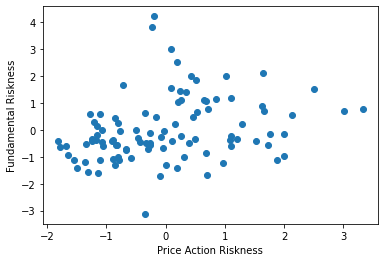

In [21]:
plt.scatter(df_reduced['PC1'], df_reduced['PC2'])
plt.xlabel('Price Action Riskness')
plt.ylabel('Fundamental Riskness')

plt.show()

### K-means clustering
We can now proceed to cluster this data, so that we can group the stocks into similar levels of risk. We start by using the K-Means approach.

#### Elbow method
Before proceeding to cluster the data, we have to use the elbow method in order to determine the optimal number of clusters for our K-means algorithm. The elbow method is a heuristic approach that consists of plotting the within-cluster sum of squares (WSS) against the number of clusters. The WSS is the sum of the squared distance between each point and the centroid of its assigned cluster. The idea is to choose the number of clusters at the point where the rate of decrease in WSS begins to level off. This point resembles an elbow in the plot, hence the name. By doing this, we can avoid choosing too few or too many clusters and find the sweet spot that balances simplicity and accuracy in our clustering algorithm.

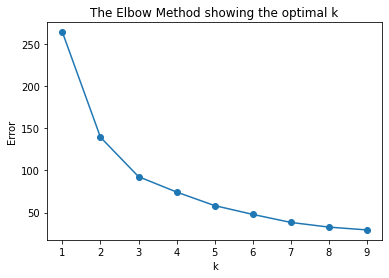

In [22]:
errors = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, max_iter = 1000, n_init = 10)
    kmeanModel.fit(df_reduced[["PC1", "PC2"]])
    errors.append(kmeanModel.inertia_)

plt.plot(K, errors, 'o-')
plt.xlabel('k')
plt.ylabel('Error')
plt.title('The Elbow Method showing the optimal k')
plt.show()

  As we can see, the optimal value of k (the *elbow* of the plot) is 3.

In [23]:
k = 3

Let's use this value to perform k-means clustering on the reduced dataframe.

We then create a new column "Cluster (K-means)" which indicates, for each share, the cluster to which it belongs.

In [24]:
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_reduced[["PC1", "PC2"]])
df_reduced['Cluster (K-Means)'] = kmeans.labels_
centers = kmeans.cluster_centers_

df_reduced

,PC1,PC2,Cluster (K-Means)
Stock Name,,,
NFLX,1.999032,-0.976858,2
TSLA,3.326698,0.778546,2
COIN,2.129356,0.545645,2
NVDA,1.198771,-0.338534,2
META,1.876531,-1.112057,2
...,...,...,...
BNGO,0.261145,1.096776,0
NOK,-0.862146,-1.292863,1
CRON,-0.795873,0.243346,1


 Finally, we plotted the reduced dataset and clustering results in a scatterplot to visualize the relationship between the two principal components and the clustering of the stocks.

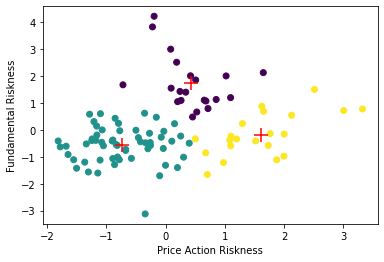

In [25]:
plt.scatter(df_reduced['PC1'], df_reduced['PC2'], c=df_reduced["Cluster (K-Means)"])

plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='+', s=200, alpha=1)
plt.xlabel('Price Action Riskness')
plt.ylabel('Fundamental Riskness')

plt.show()

### Hierarchical Clustering

Hierarchical clustering is a clustering algorithm that aims to group similar data points together based on their distances or similarities. It creates a hierarchy of clusters where the data points are progressively merged or split based on their similarity.

In hierarchical clustering, the number of clusters does not need to be specified in advance. However, to remain consistent with the other clustering and to be able to compare them more easily, we still set the number of clusters to 3.

In [26]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, linkage="ward")

df_reduced["Cluster (Hierarchical)"] = hierarchical_cluster.fit_predict(df_reduced[["PC1", "PC2"]])
df_reduced

,PC1,PC2,Cluster (K-Means),Cluster (Hierarchical)
Stock Name,,,,
NFLX,1.999032,-0.976858,2,2
TSLA,3.326698,0.778546,2,2
COIN,2.129356,0.545645,2,2
NVDA,1.198771,-0.338534,2,2
META,1.876531,-1.112057,2,2
...,...,...,...,...
BNGO,0.261145,1.096776,0,1
NOK,-0.862146,-1.292863,1,0
CRON,-0.795873,0.243346,1,0


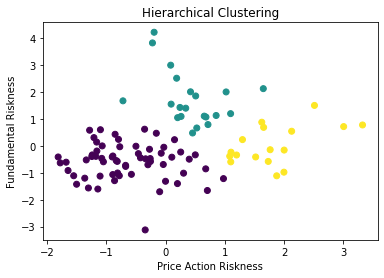

In [27]:
plt.scatter(df_reduced["PC1"], df_reduced["PC2"], c=df_reduced["Cluster (Hierarchical)"])
plt.xlabel('Price Action Riskness')
plt.ylabel('Fundamental Riskness')
plt.title("Hierarchical Clustering")
plt.show()

We can see that the resulting clusters are very similar to those obtained previously.

### Conclusions

We were able to identify three stock clusters with similar risk levels:
- Cluster on the left (green in the k-means graph): medium-low price action risk and medium-low fundamental risk.
- Central cluster (purple in the k-means graph): medium price-action risk and medium-high fundamental risk.
- Cluster on the right (yellow in the k-means graph): medium-high price-action risk and medium fundamental risk.

The use cases of such an analysis can be many. For example, an asset management / investment firm could use clustering of this type to propose different types of stock / ETF packages to clients with similar risk propension propensity. It could even be done clustering with the same objectives (identifying various levels of risk appetite) on customer data so that it can be matched with the most suitable actions for them.

## Part 2: Predictive Task

### Initial Exploratory Analysis

Let's import the dataset.

In [28]:
df_values = pd.read_csv("./datasets/stock_values_train.csv")
df_values

,Unnamed: 0,Date,Stock Name,Adj Close,Close,High,Low,Open,Volume
0,0,2021-09-30,AMD,102.900002,102.900002,104.440002,101.989998,102.080002,5.763670e+07
1,1,2021-10-01,AMD,102.618749,102.618749,103.540001,101.146249,102.405000,4.754601e+07
2,2,2021-10-04,AMD,101.456120,101.456120,102.677755,100.469591,102.065713,4.469963e+07
3,3,2021-10-05,AMD,101.618748,101.618748,102.766104,100.534118,101.539190,3.861303e+07
4,4,2021-10-06,AMD,102.495418,102.495418,103.179835,100.454260,101.066778,3.881197e+07
...,...,...,...,...,...,...,...,...,...
3775,3775,2022-06-24,ZS,160.449950,160.449950,162.911347,153.214692,155.147785,2.797597e+06
3776,3776,2022-06-27,ZS,161.961968,161.961968,166.442810,157.128815,161.088671,2.437118e+06
3777,3777,2022-06-28,ZS,159.145180,159.145180,166.473688,155.609290,162.073204,2.318711e+06
3778,3778,2022-06-29,ZS,157.467107,157.467107,162.344210,153.725571,158.715919,2.109947e+06


Let's visualize the prices of the 20 selected stocks.

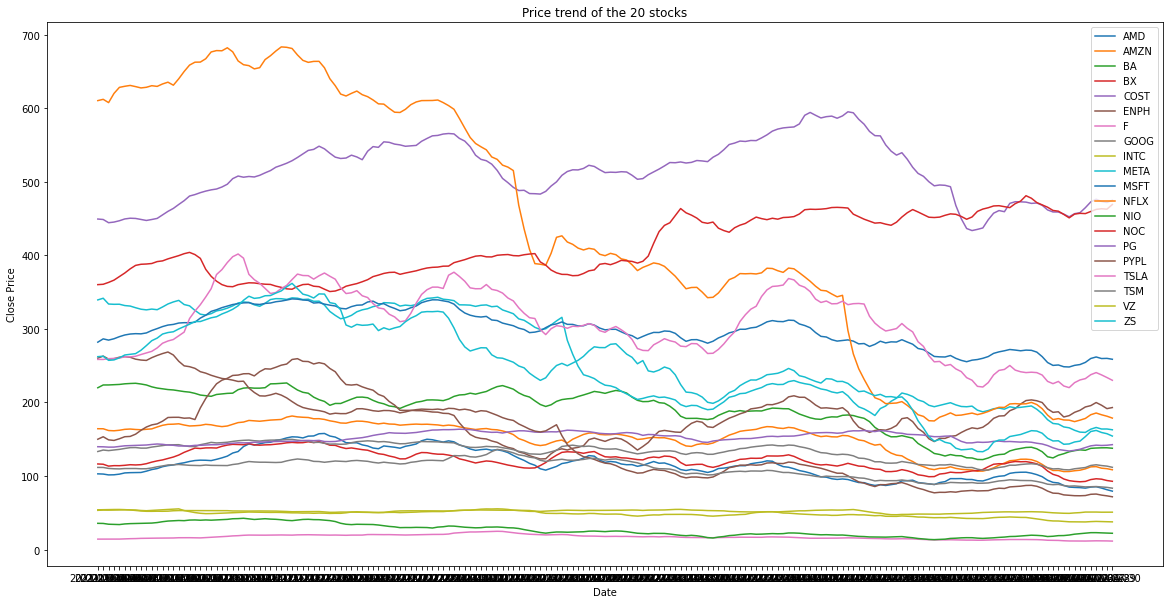

In [29]:
stocks = df_values['Stock Name'].unique()

plt.figure(figsize=(20, 10))
for stock in stocks:
    data = df_values[df_values['Stock Name'] == stock]
    plt.plot(data["Date"], data['Close'], label=stock)

plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Price trend of the 20 stocks')
plt.show()

### Data preparation for learning models

Let's create a new `Target` column that indicates whether the next day's closing price will be higher or lower than today's:

In [30]:
df_values = df_values[["Stock Name", "Date", "Close"]]
df_values["Target"] = np.where(df_values['Close'].shift(-1) > df_values['Close'], 1, 0)
df_values

,Stock Name,Date,Close,Target
0,AMD,2021-09-30,102.900002,0
1,AMD,2021-10-01,102.618749,0
2,AMD,2021-10-04,101.456120,1
3,AMD,2021-10-05,101.618748,1
4,AMD,2021-10-06,102.495418,1
...,...,...,...,...
3775,ZS,2022-06-24,160.449950,1
3776,ZS,2022-06-27,161.961968,0
3777,ZS,2022-06-28,159.145180,0
3778,ZS,2022-06-29,157.467107,0


### Basic Model using Logistic Regression

Now we can start building the predictive models, using the previous 10 closing prices as input. We divide each group into two parts (`test_size=0.2`): one for the train and the other for the model test.

In [31]:
grouped = df_values.groupby('Stock Name')

# prepare dataframes to store data on model predictions and performance
df_values["Prediction"] = np.nan
df_predicted = pd.DataFrame(columns=df_values.columns)
accuracies_basic = pd.DataFrame(columns=["Logistic Regression"])

# let's create a model for each stock
basic_models = {}
for name, group in  grouped:
    X = np.array([group['Close'].iloc[i-10:i] for i in range(10, len(group))])
    y = group["Target"].iloc[10:]
    
    # divide into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    # create and train the model
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)

    # evaluate the model with cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5)
    accuracy_cv = np.mean(cv_scores)

    # accuracies_basic.loc[name] = [accuracy_cv]
    print(f"Cross-validation accuracy for {name}: {accuracy_cv}")

    # make predictions on the whole dataset and save them
    y_pred = model.predict(X)
    group["Prediction"].iloc[10:] = y_pred
    df_predicted = pd.concat([df_predicted, group])

    # save accuracy score
    accuracy = accuracy_score(y_true=y, y_pred=y_pred)
    accuracies_basic.loc[name] = [accuracy]
    print(f"Accuracy score: {accuracy}\n")
    
    # add the model to the model dictionary
    basic_models[name] = model

Cross-validation accuracy for AMD: 0.5980952380952381
Accuracy score: 0.6368715083798883

Cross-validation accuracy for AMZN: 0.5136679536679536
Accuracy score: 0.5921787709497207

Cross-validation accuracy for BA: 0.6064864864864865
Accuracy score: 0.6871508379888268

Cross-validation accuracy for BX: 0.5305148005148005
Accuracy score: 0.6312849162011173



Cross-validation accuracy for COST: 0.5582539682539682
Accuracy score: 0.6480446927374302

Cross-validation accuracy for ENPH: 0.6234062634062634
Accuracy score: 0.6480446927374302

Cross-validation accuracy for F: 0.5638095238095239
Accuracy score: 0.6089385474860335

Cross-validation accuracy for GOOG: 0.5255555555555557
Accuracy score: 0.6033519553072626

Cross-validation accuracy for INTC: 0.6314757614757615
Accuracy score: 0.6424581005586593

Cross-validation accuracy for META: 0.5804761904761906
Accuracy score: 0.6145251396648045

Cross-validation accuracy for MSFT: 0.5365293865293865
Accuracy score: 0.6424581005586593

Cross-validation accuracy for NFLX: 0.5919047619047619
Accuracy score: 0.6424581005586593

Cross-validation accuracy for NIO: 0.5362162162162162
Accuracy score: 0.5865921787709497

Cross-validation accuracy for NOC: 0.5457915057915057
Accuracy score: 0.6759776536312849

Cross-validation accuracy for PG: 0.5523809523809524
Accuracy score: 0.6480446927374302

Cross-

Now we have in the `Prediction` column the prediction made by the model. We now convert the values of the two created columns into integers to avoid problems when displaying confusion matrices.

In [32]:
df_predicted["Prediction"] = df_predicted["Prediction"].fillna(-1)
df_predicted = df_predicted.astype({'Prediction':'int'})
df_predicted["Target"] = df_predicted["Target"].fillna(-1)
df_predicted = df_predicted.astype({'Target':'int'})
df_predicted

,Stock Name,Date,Close,Target,Prediction
0,AMD,2021-09-30,102.900002,0,-1
1,AMD,2021-10-01,102.618749,0,-1
2,AMD,2021-10-04,101.456120,1,-1
3,AMD,2021-10-05,101.618748,1,-1
4,AMD,2021-10-06,102.495418,1,-1
...,...,...,...,...,...
3775,ZS,2022-06-24,160.449950,1,1
3776,ZS,2022-06-27,161.961968,0,1
3777,ZS,2022-06-28,159.145180,0,1
3778,ZS,2022-06-29,157.467107,0,0


Let's create the confusion matrix by aggregating the data from all stocks.

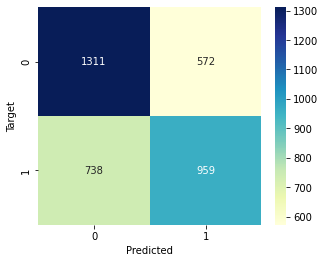

In [33]:
grouped_predicted = df_predicted.groupby('Stock Name')
y_true_all = []
y_pred_all = []
for name, group in grouped_predicted:
    y_true = group["Target"].iloc[10:]
    y_pred = group["Prediction"].iloc[10:]
    y_true_all.extend(y_true)
    y_pred_all.extend(y_pred)

plt.figure(figsize=(5,4))
cm_all = confusion_matrix(y_true_all, y_pred_all)
sns.heatmap(cm_all, annot=True, fmt='g', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Target')

plt.show()

We can visualize data on individual model accuracies using a boxplot, in order to analyze their distribution and max/mins. Let's use the dataframe created earlier which contains the cross-validation accuracy scores.

In [34]:
accuracies_basic.head()

,Logistic Regression
AMD,0.636872
AMZN,0.592179
BA,0.687151
BX,0.631285
COST,0.648045


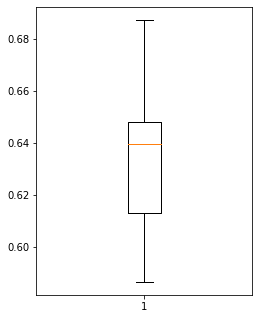

In [35]:
fig = plt.figure(figsize=(3, 4))
axes = fig.add_axes([0, 0, 1, 1])
vp = axes.boxplot(accuracies_basic["Logistic Regression"])
plt.show()

Most models have more than 50% accuracy, not bad! Now let's try to integrate the tweets.

#### Tweets preprocessing

Let's start by analyzing and adjusting the tweets dataset.

In [36]:
df_tw = pd.read_csv("./datasets/stock_tweets_train.csv")
df_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59981 entries, 0 to 59980
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    59981 non-null  int64 
 1   Date          59981 non-null  object
 2   Tweet         59981 non-null  object
 3   Stock Name    59981 non-null  object
 4   Company Name  59981 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.3+ MB


We observe that we have no null values. Now let's take a look at the dataset

In [37]:
df_tw.head()

,Unnamed: 0,Date,Tweet,Stock Name,Company Name
0,0,2021-09-30 13:02:29+00:00,AMD Expands Collaboration With Google Cloud to...,AMD,"Advanced Micro Devices, Inc."
1,1,2021-09-30 13:02:37+00:00,$AMD expanding partnership with $GOOGL Cloud t...,AMD,"Advanced Micro Devices, Inc."
2,2,2021-09-30 17:00:16+00:00,Built by our very own @AMD Product Engineering...,AMD,"Advanced Micro Devices, Inc."
3,3,2021-09-30 19:12:12+00:00,$AMD Breakout and retest.. https://t.co/HGYKEx...,AMD,"Advanced Micro Devices, Inc."
4,4,2021-09-30 20:22:15+00:00,Read @TheNextPlatform's breakdown of our ambit...,AMD,"Advanced Micro Devices, Inc."


We eliminate the columns we don't need and convert the dates into the correct format, ignoring the times, so that we have the same shape as the dates in the other dataset and can then join them easily.

In [38]:
df_tw = df_tw[["Date", "Tweet", "Stock Name"]]
df_tw["Date"] = pd.to_datetime(df_tw["Date"]).dt.date
df_tw.head()

,Date,Tweet,Stock Name
0,2021-09-30,AMD Expands Collaboration With Google Cloud to...,AMD
1,2021-09-30,$AMD expanding partnership with $GOOGL Cloud t...,AMD
2,2021-09-30,Built by our very own @AMD Product Engineering...,AMD
3,2021-09-30,$AMD Breakout and retest.. https://t.co/HGYKEx...,AMD
4,2021-09-30,Read @TheNextPlatform's breakdown of our ambit...,AMD


#### Sentiment Analysis

Before starting to study the polarity of tweets we need to deal with stopwords.
Stopwords are commonly used words in a language that are typically filtered out or ignored in natural language processing (NLP) tasks. These words, such as "the," "is," "and," and "in," do not carry significant meaning on their own and occur frequently in text. Since they appear in almost all documents, removing stopwords can help reduce noise and improve the efficiency of text analysis algorithms.

 Let's download them first.

In [39]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\39334\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Now that we have them we can remove them from tweets, so we can do more accurate analysis.

In [40]:
df_tw['Tweet'] = df_tw['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df_tw

,Date,Tweet,Stock Name
0,2021-09-30,AMD Expands Collaboration With Google Cloud De...,AMD
1,2021-09-30,"$AMD expanding partnership $GOOGL Cloud ""deliv...",AMD
2,2021-09-30,"Built @AMD Product Engineering Manager, Burton...",AMD
3,2021-09-30,$AMD Breakout retest.. https://t.co/HGYKExVV3F...,AMD
4,2021-09-30,Read @TheNextPlatform's breakdown ambitious 20...,AMD
...,...,...,...
59976,2022-06-20,$ZM $NIO $ZS $SE Daily Here handful bear flag ...,ZS
59977,2022-06-20,Making bold prediction! Revisit 18 months! We ...,ZS
59978,2022-06-24,Here Portfolio Allocations end week. Still wor...,ZS
59979,2022-06-28,JPMorgan’s CIO software survey results highlig...,ZS


We can now use the TextBlob module to analyze the polarity of each tweet, which is a number ranging from -1 to 1 that represents the sentiment of that tweet about a given topic (-1 very bad, 0 neutral, 1 very good). We then save this data in a new `Sentiment` column.

In [41]:
df_tw['Sentiment'] = df_tw['Tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_tw

,Date,Tweet,Stock Name,Sentiment
0,2021-09-30,AMD Expands Collaboration With Google Cloud De...,AMD,0.000000
1,2021-09-30,"$AMD expanding partnership $GOOGL Cloud ""deliv...",AMD,0.000000
2,2021-09-30,"Built @AMD Product Engineering Manager, Burton...",AMD,0.125000
3,2021-09-30,$AMD Breakout retest.. https://t.co/HGYKExVV3F...,AMD,0.000000
4,2021-09-30,Read @TheNextPlatform's breakdown ambitious 20...,AMD,0.125000
...,...,...,...,...
59976,2022-06-20,$ZM $NIO $ZS $SE Daily Here handful bear flag ...,ZS,0.000000
59977,2022-06-20,Making bold prediction! Revisit 18 months! We ...,ZS,0.060833
59978,2022-06-24,Here Portfolio Allocations end week. Still wor...,ZS,0.000000
59979,2022-06-28,JPMorgan’s CIO software survey results highlig...,ZS,-0.266667


Since the price data is daily, but we have several tweets per day, we need to group the values so that we have a polarity value for each day.

In [42]:
df_tw = df_tw.groupby(['Stock Name', 'Date']).agg({'Sentiment': 'mean'}).reset_index()
df_tw

,Stock Name,Date,Sentiment
0,AMD,2021-09-30,0.101042
1,AMD,2021-10-01,0.152178
2,AMD,2021-10-02,0.058333
3,AMD,2021-10-04,0.456250
4,AMD,2021-10-05,0.558333
...,...,...,...
3642,ZS,2022-06-09,0.000000
3643,ZS,2022-06-20,0.030417
3644,ZS,2022-06-24,0.000000
3645,ZS,2022-06-28,-0.266667


Now we can merge the two dataframes. Since the tweets dataframe covers fewer days than the other, we fill null values with 0 (neutral).

In [43]:
df_values["Date"] = pd.to_datetime(df_values["Date"]).dt.date
df_values_tw = df_values.merge(df_tw, on=['Stock Name', 'Date'], how='left')

df_values_tw['Sentiment'] = df_values_tw['Sentiment'].fillna(0.0)
df_values_tw

,Stock Name,Date,Close,Target,Prediction,Sentiment
0,AMD,2021-09-30,102.900002,0,NaN,0.101042
1,AMD,2021-10-01,102.618749,0,NaN,0.152178
2,AMD,2021-10-04,101.456120,1,NaN,0.456250
3,AMD,2021-10-05,101.618748,1,NaN,0.558333
4,AMD,2021-10-06,102.495418,1,NaN,0.000000
...,...,...,...,...,...,...
3775,ZS,2022-06-24,160.449950,1,NaN,0.000000
3776,ZS,2022-06-27,161.961968,0,NaN,0.000000
3777,ZS,2022-06-28,159.145180,0,NaN,-0.266667
3778,ZS,2022-06-29,157.467107,0,NaN,0.000000


We can now try using different classification models and find the one that predicts the most accurately.

### Logistic Regression with Prices and Tweets

We still use Logistic Regression so that we can then compare accuracies. We also save all models created for future use in the `models_LR` dictionary. The procedure will be the same, with the difference that we will not only use an array of the last 10 prices as input, but we will also associate the sentiment level on that day with each value.

For completeness, we also generate and print the classification report of each model.

We have also chosen to save the accuracies obtained from the various models in a separate dataframe so that they can be easily compared with boxplots to analyze their values ​​and their distributions. For simplicity we save the values ​​obtained by the `accuracy_score()` function, so that we can compare them immediately. We are not so much interested in the actual value (which is boosted by the fact that most of the data are those used for training) but in the differences between the various models (trained on the same portions of data).

In [44]:
grouped = df_values_tw.groupby('Stock Name')

df_values_tw["Prediction"] = np.nan
df_predicted_LR = pd.DataFrame(columns=df_values_tw.columns)
accuracies = pd.DataFrame(columns=["Logistic Regression"])

models_LR = {}
for name, group in grouped:
    print(f"-------------------------- {name} --------------------------")
    X = np.array([group[['Close', 'Sentiment']].iloc[i-10:i] for i in range(10, len(group))])
    X = X.reshape(X.shape[0], -1)
    y = group["Target"].iloc[10:]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)

    # show classification report
    class_rep = classification_report(y_true=y_train, y_pred=model.predict(X_train))
    print(class_rep)

    # cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5)
    accuracy_cv = np.mean(cv_scores)
    # accuracies.loc[name] = [accuracy_cv]
    print(f"Average Cross-validation score: {accuracy_cv}")

    # make predictions on the entire dataset
    y_pred = model.predict(X)
    group["Prediction"].iloc[10:] = y_pred
    df_predicted_LR = pd.concat([df_predicted_LR, group])
    
    # save accuracy scores
    accuracy = accuracy_score(y_true=y, y_pred=y_pred)
    accuracies.loc[name] = [accuracy]
    print(f"Accuracy score: {accuracy}")
    
    # add the model to the dictionary for future use
    models_LR[name] = model

df_values_tw = df_values_tw.drop(columns=["Prediction"])

-------------------------- AMD --------------------------
              precision    recall  f1-score   support

           0       0.65      0.66      0.65        73
           1       0.64      0.63      0.63        70

   micro avg       0.64      0.64      0.64       143
   macro avg       0.64      0.64      0.64       143
weighted avg       0.64      0.64      0.64       143

Average Cross-validation score: 0.6146031746031746
Accuracy score: 0.6424581005586593
-------------------------- AMZN --------------------------


              precision    recall  f1-score   support

           0       0.65      0.78      0.71        81
           1       0.61      0.45      0.52        62

   micro avg       0.64      0.64      0.64       143
   macro avg       0.63      0.61      0.61       143
weighted avg       0.63      0.64      0.63       143

Average Cross-validation score: 0.5076447876447877
Accuracy score: 0.5977653631284916
-------------------------- BA --------------------------
              precision    recall  f1-score   support

           0       0.68      0.78      0.73        80
           1       0.65      0.54      0.59        63

   micro avg       0.67      0.67      0.67       143
   macro avg       0.67      0.66      0.66       143
weighted avg       0.67      0.67      0.67       143

Average Cross-validation score: 0.5788416988416987
Accuracy score: 0.6536312849162011
-------------------------- BX --------------------------
              precision    recall  f1-score   support

     

Let's create the confusion matrix.

In [45]:
df_predicted_LR["Prediction"] = df_predicted_LR["Prediction"].fillna(-1)
df_predicted_LR = df_predicted_LR.astype({'Prediction':'int'})
df_predicted_LR["Target"] = df_predicted_LR["Target"].fillna(-1)
df_predicted_LR = df_predicted_LR.astype({'Target':'int'})
df_predicted_LR

,Stock Name,Date,Close,Target,Prediction,Sentiment
0,AMD,2021-09-30,102.900002,0,-1,0.101042
1,AMD,2021-10-01,102.618749,0,-1,0.152178
2,AMD,2021-10-04,101.456120,1,-1,0.456250
3,AMD,2021-10-05,101.618748,1,-1,0.558333
4,AMD,2021-10-06,102.495418,1,-1,0.000000
...,...,...,...,...,...,...
3775,ZS,2022-06-24,160.449950,1,1,0.000000
3776,ZS,2022-06-27,161.961968,0,1,0.000000
3777,ZS,2022-06-28,159.145180,0,1,-0.266667
3778,ZS,2022-06-29,157.467107,0,1,0.000000


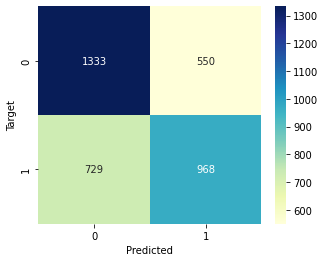

In [46]:
grouped_predicted = df_predicted_LR.groupby('Stock Name')
y_true_all = []
y_pred_all = []
for name, group in grouped_predicted:
    y_true = group["Target"].iloc[10:]
    y_pred = group["Prediction"].iloc[10:]
    y_true_all.extend(y_true)
    y_pred_all.extend(y_pred)

cm_all = confusion_matrix(y_true_all, y_pred_all)
plt.figure(figsize=(5,4))
sns.heatmap(cm_all, annot=True, fmt='g', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.show()

Let's plot the stock prices, colored green if the model predicted the price will go up, red otherwise.

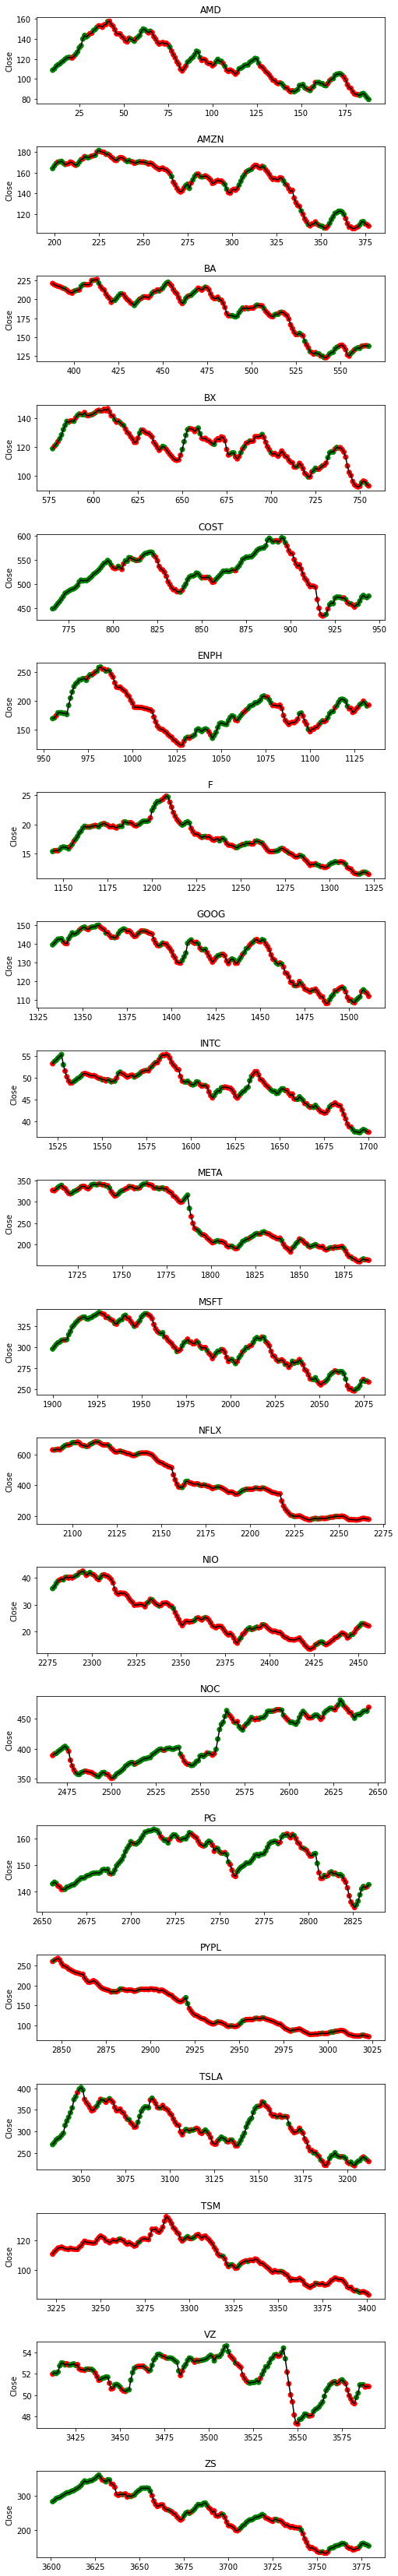

In [47]:
grouped = df_predicted_LR.groupby('Stock Name')

fig, axes = plt.subplots(len(grouped), 1, figsize=(8, 60))

for i, (name, group) in enumerate(grouped):
    group = group.iloc[10:]
    # set the line color based on the Prediction column
    colors = ['red' if p == 0 else 'green' for p in group['Prediction']]

    # create the plot
    axes[i].plot(group.index, group['Close'], color='black')
    axes[i].scatter(group.index, group['Close'], color=colors)
    axes[i].set_title(name)
    axes[i].set_ylabel('Close')
    
plt.subplots_adjust(hspace=0.5)
plt.show()


We can see that actually when prices tend to fall the model predicts the same, and vice versa.

Let's compare the accuracy of the previous model with the new one.

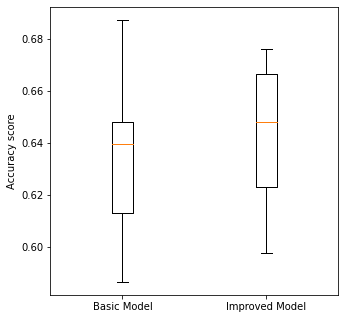

In [48]:
fig = plt.figure(figsize=(4, 4))
axes = fig.add_axes([0, 0, 1, 1])
bp1 = axes.boxplot([accuracies_basic["Logistic Regression"], accuracies["Logistic Regression"]])
axes.set_xticklabels(["Basic Model", "Improved Model"])
plt.ylabel("Accuracy score")
plt.show()

We observe that the model is now slightly more accurate, with no outliers and more accurate predictions.

However, there have been no significant improvements from before. Possible reasons for limited improvement when adding tweet sentiment to stock price models include weak correlation between sentiment and price movements, noise and inaccuracies in sentiment analysis, and the presence of irrelevant or conflicting information in tweets.

### Random Forest

Random Forest is a popular classification model that combines multiple decision trees to make predictions. It is called a "forest" because it consists of a large number of individual decision trees that work together as a group.
Random Forests are known for their ability to handle large and complex datasets, as well as their robustness against overfitting.

In [49]:
from sklearn.ensemble import RandomForestClassifier

df_values_tw["Prediction"] = np.nan
df_predicted_RF = pd.DataFrame(columns=df_values_tw.columns)

models_RF = {}
for name, group in grouped:
    # print(f"-------------------------- {name} --------------------------")
    X = np.array([group[['Close', 'Sentiment']].iloc[i-10:i] for i in range(10, len(group))])
    X = X.reshape(X.shape[0], -1)
    y = group["Target"].iloc[10:].astype(int)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    model = RandomForestClassifier(criterion='gini',
                                 n_estimators=5,
                                 random_state=1,
                                 n_jobs=2)
    model.fit(X_train, y_train)

    # show classification report
    class_rep = classification_report(y_true=y_train, y_pred=model.predict(X_train))
    # print(class_rep)

    # cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5)
    accuracy_cv = np.mean(cv_scores)
    # accuracies.loc[name, "Random Forest"] = accuracy_cv
    print(f"Cross-validation accuracy for {name}: {accuracy_cv}")

    # make predictions on the entire dataset
    y_pred = model.predict(X)
    group["Prediction"].iloc[10:] = y_pred
    df_predicted_RF = pd.concat([df_predicted_RF, group])
    
    # save accuracy scores
    accuracy = accuracy_score(y_true=y, y_pred=y_pred)
    accuracies.loc[name, "Random Forest"] = accuracy
    print(f"Accuracy score for {name}: {accuracy}")
    print()

    # add the model to the dictionary for future use
    models_RF[name] = model

df_values_tw = df_values_tw.drop(columns=["Prediction"])

Cross-validation accuracy for AMD: 0.41412698412698407
Accuracy score for AMD: 0.8659217877094972

Cross-validation accuracy for AMZN: 0.437992277992278
Accuracy score for AMZN: 0.8435754189944135

Cross-validation accuracy for BA: 0.5416216216216216
Accuracy score for BA: 0.8715083798882681

Cross-validation accuracy for BX: 0.47057057057057056
Accuracy score for BX: 0.8491620111731844

Cross-validation accuracy for COST: 0.42444444444444446
Accuracy score for COST: 0.888268156424581

Cross-validation accuracy for ENPH: 0.3917074217074217
Accuracy score for ENPH: 0.8435754189944135

Cross-validation accuracy for F: 0.2919047619047619
Accuracy score for F: 0.88268156424581

Cross-validation accuracy for GOOG: 0.41396825396825393
Accuracy score for GOOG: 0.8547486033519553

Cross-validation accuracy for INTC: 0.4533118833118833
Accuracy score for INTC: 0.9050279329608939

Cross-validation accuracy for META: 0.5301587301587302
Accuracy score for META: 0.8603351955307262

Cross-validation

Seems that we have lower cross-validation scores, but more accurate predictions. Let's create the confusion matrix.

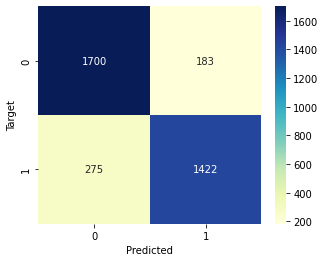

In [50]:
grouped_predicted = df_predicted_RF.groupby('Stock Name')
y_true_all = []
y_pred_all = []
for name, group in grouped_predicted:
    y_true = group["Target"].iloc[10:]
    y_pred = group["Prediction"].iloc[10:]
    y_true_all.extend(y_true)
    y_pred_all.extend(y_pred)

cm_all = confusion_matrix(y_true_all, y_pred_all)
plt.figure(figsize=(5,4))
sns.heatmap(cm_all, annot=True, fmt='g', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.show()

The Random Forest model seems more accurate in both positive and negative predictions.

Let's try to compare the results obtained from the two models with the boxplots.

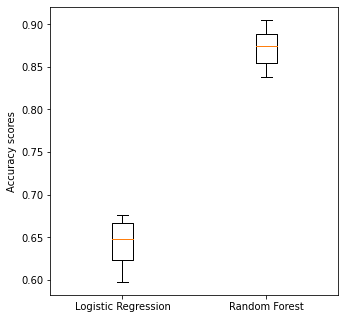

In [51]:
fig = plt.figure(figsize=(4, 4))
axes = fig.add_axes([0, 0, 1, 1])
bp1 = axes.boxplot([accuracies["Logistic Regression"], accuracies["Random Forest"]])
axes.set_xticklabels(["Logistic Regression", "Random Forest"])
plt.ylabel("Accuracy scores")
plt.show()

Random Forest makes way more accurate predictions on our dataset. 

Let's plot again the stock prices.

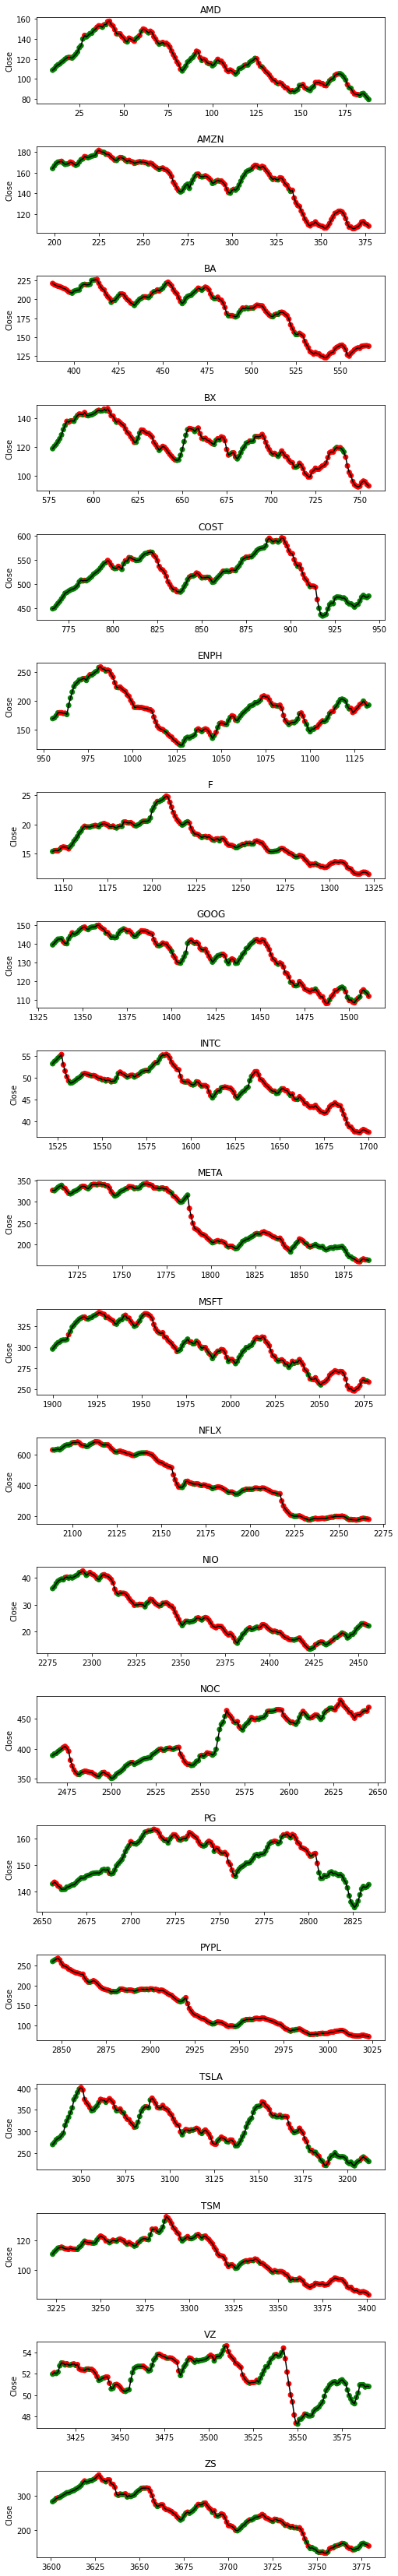

In [52]:
grouped = df_predicted_RF.groupby('Stock Name')

fig, axes = plt.subplots(len(grouped), 1, figsize=(8, 60))

for i, (name, group) in enumerate(grouped):
    group = group.iloc[10:]
    # set the line color based on the Prediction column
    colors = ['red' if p == 0 else 'green' for p in group['Prediction']]

    # create the plot
    axes[i].plot(group.index, group['Close'], color='black')
    axes[i].scatter(group.index, group['Close'], color=colors)
    axes[i].set_title(name)
    axes[i].set_ylabel('Close')
    
plt.subplots_adjust(hspace=0.5)
plt.show()

### Gaussian Naive Bayes Classifier

This classifier calculates the likelihood of each class based on the probability density function of the features given the class. It also considers the prior probability of each class. Using these probabilities, it determines the most probable class for a given sample. The "naive" assumption of feature independence simplifies the calculations, making the model computationally efficient. Gaussian Naive Bayes is commonly used for classification tasks, especially when dealing with continuous or real-valued features.

In [53]:
df_values_tw["Prediction"] = np.nan
df_predicted_NB = pd.DataFrame(columns=df_values_tw.columns)

models_NB = {}
for name, group in grouped:
    X = np.array([group[['Close', 'Sentiment']].iloc[i-10:i] for i in range(10, len(group))])
    X = X.reshape(X.shape[0], -1)
    y = group["Target"].iloc[10:].astype(int)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model = GaussianNB()
    model.fit(X_train, y_train)

    # show classification report
    # class_rep = classification_report(y_true=y_train, y_pred=model.predict(X_train))
    # print(class_rep)

    # cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5)
    accuracy_cv = np.mean(cv_scores)
    # accuracies.loc[name, "Gaussian Naive Bayes"] = accuracy_cv
    print(f"Cross-validation accuracy for {name}: {accuracy_cv}")

    # make predictions on the entire dataset
    y_pred = model.predict(X)
    group["Prediction"].iloc[10:] = y_pred
    df_predicted_NB = pd.concat([df_predicted_NB, group])

    accuracy = accuracy_score(y_true=y, y_pred=y_pred)
    accuracies.loc[name, "Gaussian Naive Bayes"] = accuracy
    print(f"Accuracy score: {accuracy}")
    print()
    # add the model to the dictionary for future use
    models_NB[name] = model

df_values_tw = df_values_tw.drop(columns=["Prediction"])

Cross-validation accuracy for AMD: 0.3133333333333333
Accuracy score: 0.5921787709497207

Cross-validation accuracy for AMZN: 0.5247876447876448
Accuracy score: 0.5921787709497207

Cross-validation accuracy for BA: 0.5244787644787645
Accuracy score: 0.6145251396648045

Cross-validation accuracy for BX: 0.46499785499785506
Accuracy score: 0.5307262569832403

Cross-validation accuracy for COST: 0.4688888888888889
Accuracy score: 0.6145251396648045

Cross-validation accuracy for ENPH: 0.40960960960960957
Accuracy score: 0.6145251396648045

Cross-validation accuracy for F: 0.403015873015873
Accuracy score: 0.5698324022346368

Cross-validation accuracy for GOOG: 0.43571428571428567
Accuracy score: 0.5977653631284916

Cross-validation accuracy for INTC: 0.38706134706134704
Accuracy score: 0.6033519553072626

Cross-validation accuracy for META: 0.4749206349206349
Accuracy score: 0.5810055865921788

Cross-validation accuracy for MSFT: 0.3984727584727585
Accuracy score: 0.6201117318435754

Cros

Seems that the prediction are less accurate than the previous models ones.

Let's visualize the accuracy with the confusion matrix and boxplots.

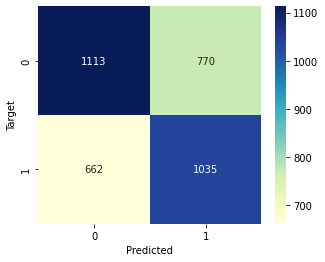

In [55]:
grouped_predicted = df_predicted_NB.groupby('Stock Name')
y_true_all = []
y_pred_all = []
for name, group in grouped_predicted:
    y_true = group["Target"].iloc[10:]
    y_pred = group["Prediction"].iloc[10:]
    y_true_all.extend(y_true)
    y_pred_all.extend(y_pred)

cm_all = confusion_matrix(y_true_all, y_pred_all)
plt.figure(figsize=(5,4))
sns.heatmap(cm_all, annot=True, fmt='g', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.show()

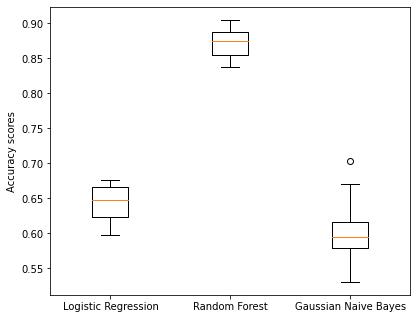

In [56]:
fig = plt.figure(figsize=(5, 4))
axes = fig.add_axes([0, 0, 1, 1])
bp1 = axes.boxplot([accuracies["Logistic Regression"], accuracies["Random Forest"], accuracies["Gaussian Naive Bayes"]])
axes.set_xticklabels(["Logistic Regression", "Random Forest", "Gaussian Naive Bayes"])
plt.ylabel("Accuracy scores")
plt.show()

Although we have accuracies above 50%, this model performed much worser than the other two.

### Gradient Boosting Classifier

The Gradient Boosting Classifier is a model that combines multiple weak prediction models (usually decision trees) to create a strong predictive model. It iteratively builds an ensemble of models by assigning weights to each model based on its performance, and then combining their predictions to make the final prediction. This iterative process aims to minimize the overall prediction error and improve the model's accuracy. The model is well-suited for classification tasks and has been widely used in various domains.

In [59]:
df_values_tw["Prediction"] = np.nan
df_predicted_GB = pd.DataFrame(columns=df_values_tw.columns)

models_GB = {}
for name, group in grouped:
    X = np.array([group[['Close', 'Sentiment']].iloc[i-10:i] for i in range(10, len(group))])
    X = X.reshape(X.shape[0], -1)
    y = group["Target"].iloc[10:].astype(int)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model = GradientBoostingClassifier()
    model.fit(X_train, y_train)

    # show classification report
    # class_rep = classification_report(y_true=y_train, y_pred=model.predict(X_train))
    # print(class_rep)

    # cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5)
    accuracy_cv = np.mean(cv_scores)
    print(f"Cross-validation accuracy for {name}: {accuracy_cv}")

    # make predictions on the entire dataset
    y_pred = model.predict(X)
    group["Prediction"].iloc[10:] = y_pred
    df_predicted_GB = pd.concat([df_predicted_GB, group])


    accuracy = accuracy_score(y_true=y, y_pred=y_pred)
    accuracies.loc[name, "Gradient Boosting"] = accuracy
    print(f"Accuracy score: {accuracy}")
    print()

    # add the model to the dictionary for future use
    models_GB[name] = model

df_values_tw = df_values_tw.drop(columns=["Prediction"])

Cross-validation accuracy for AMD: 0.3355555555555556
Accuracy score: 0.9217877094972067

Cross-validation accuracy for AMZN: 0.4608494208494209
Accuracy score: 0.88268156424581

Cross-validation accuracy for BA: 0.5461003861003861
Accuracy score: 0.8938547486033519

Cross-validation accuracy for BX: 0.4258086658086658
Accuracy score: 0.8491620111731844

Cross-validation accuracy for COST: 0.4023809523809524
Accuracy score: 0.8938547486033519

Cross-validation accuracy for ENPH: 0.3910810810810811
Accuracy score: 0.88268156424581

Cross-validation accuracy for F: 0.2919047619047619
Accuracy score: 0.9217877094972067

Cross-validation accuracy for GOOG: 0.37444444444444447
Accuracy score: 0.8994413407821229

Cross-validation accuracy for INTC: 0.44174174174174174
Accuracy score: 0.8994413407821229

Cross-validation accuracy for META: 0.446984126984127
Accuracy score: 0.88268156424581

Cross-validation accuracy for MSFT: 0.39062205062205063
Accuracy score: 0.88268156424581

Cross-validat

Let's create the confusion matrix.

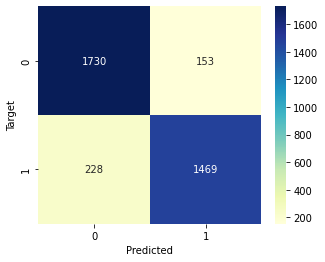

In [60]:
grouped_predicted = df_predicted_GB.groupby('Stock Name')
y_true_all = []
y_pred_all = []
for name, group in grouped_predicted:
    y_true = group["Target"].iloc[10:]
    y_pred = group["Prediction"].iloc[10:]
    y_true_all.extend(y_true)
    y_pred_all.extend(y_pred)

cm_all = confusion_matrix(y_true_all, y_pred_all)
plt.figure(figsize=(5,4))
sns.heatmap(cm_all, annot=True, fmt='g', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.show()

The models seems very accurate, let's compare their accuracy to the other ones.

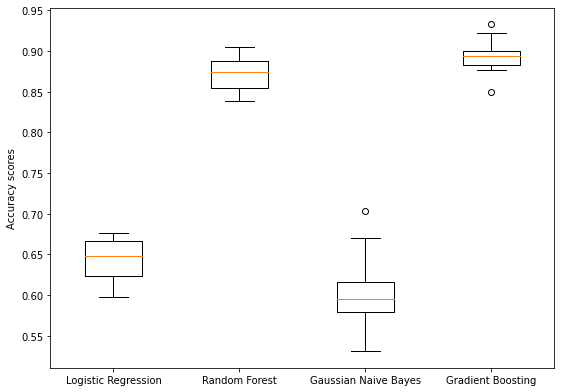

In [61]:
fig = plt.figure(figsize=(7, 5))
axes = fig.add_axes([0, 0, 1, 1])
bp1 = axes.boxplot([accuracies["Logistic Regression"], accuracies["Random Forest"], accuracies["Gaussian Naive Bayes"], accuracies["Gradient Boosting"]])
axes.set_xticklabels(["Logistic Regression", "Random Forest", "Gaussian Naive Bayes", "Gradient Boosting"])
plt.ylabel("Accuracy scores")
plt.show()

Gradient Boosting turned out to be the most accurate, slightly surpassing Random Forest's accuracy results. Let's now look at the price charts.

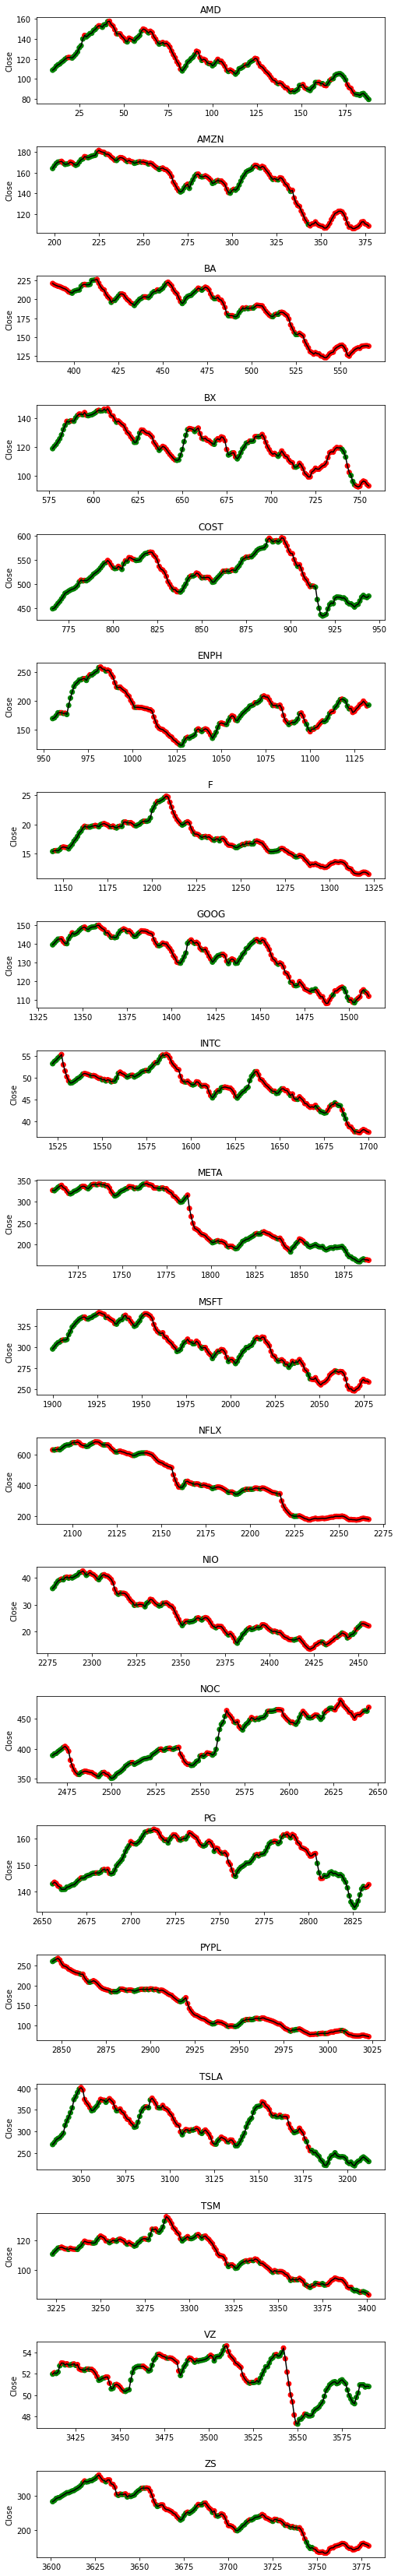

In [62]:
grouped = df_predicted_GB.groupby('Stock Name')

fig, axes = plt.subplots(len(grouped), 1, figsize=(8, 60))

for i, (name, group) in enumerate(grouped):
    group = group.iloc[10:]
    # set the line color based on the Prediction column
    colors = ['red' if p == 0 else 'green' for p in group['Prediction']]

    # create the plot
    axes[i].plot(group.index, group['Close'], color='black')
    axes[i].scatter(group.index, group['Close'], color=colors)
    axes[i].set_title(name)
    axes[i].set_ylabel('Close')

plt.subplots_adjust(hspace=0.5)
plt.show()


### Conclusions

All 4 models tested performed acceptably (we consider a model to be acceptable if it has an accuracy of >=50%, i.e. if it gets it right more times than it misses). Specifically, the models that have performed best on our datasets are Random Forest and Gradient Boosting.

Random Forest and Gradient Boosting are known for their strong performance in machine learning tasks due to their ability to handle complex relationships and capture non-linear patterns in the data. These models excel in handling high-dimensional datasets, handling missing values, and reducing overfitting. Additionally, their ensemble nature allows them to combine multiple weak learners to make more accurate predictions. The ensemble methods used by Random Forest (bagging) and Gradient Boosting (boosting) help mitigate bias and variance issues, resulting in improved performance compared to other models.

Logistic Regression and Gaussian Naive Bayes models may have performed worse compared to Random Forest and Gradient Boosting due to their limitations in capturing non-linear relationships, assuming feature independence, and their simplicity compared to ensemble methods. The performance difference can be attributed to the models' ability to handle complex patterns and reduce bias/variance.

Note Well: it is important to remember that the accuracies we are talking about are greatly boosted by the fact that we measure them on a large part of the data that has been used for training, we can obtain the most accurate values ​​by making predictions on datasets never seen before.